## Problem Statement:

### 1) To Find the closest Association of a given Book 
### 2) Try different values of support and confidence. Observe the change in number of rules for different support and confidence values
### 3) Change the minimum length in apriori algorithm
### 4) Visualize the obtained rules using different plots 

### Import libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

### Reading the csv, datafile

In [2]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


### Checking for the shape of the data - Number of rows and column in the dataset

In [3]:
book.shape

(2000, 11)

In [4]:
book.size

22000

### Checking for null values and the data types for each feature

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### Visualizing the frequency for the different book categories

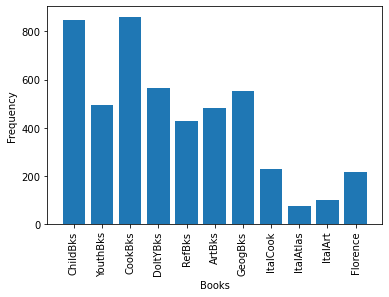

In [6]:
plt.bar (book.columns ,book.sum(axis=0))
plt.xticks(rotation = 90)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

## Implementing an apriori algorithm

In [7]:
book_sales1 = apriori(book, min_support=0.1, use_colnames=True)
book_sales1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


### Constructing an association model, using lift as the evaluation metric

In [8]:
rules1 = association_rules(book_sales1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


### Sorting the books based on the association rule in ascending order, with respect to lift criteria

In [9]:
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


### Scatter plot for support and confidence for the first association role, with respect to Lift criteria

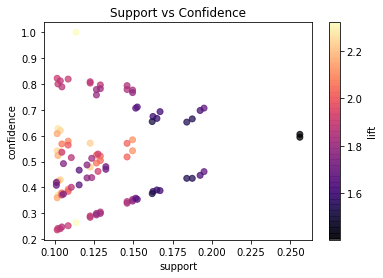

In [39]:
plt.scatter(rules1['support'], rules1['confidence'],c=rules1['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

### Scatter plot for support and lift for the first association role, with respect to Confidence criteria

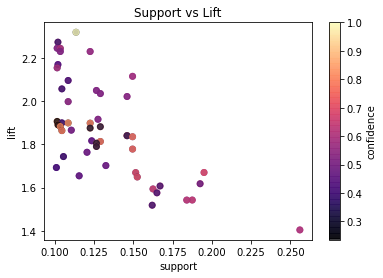

In [40]:
plt.scatter(rules1["support"], rules1["lift"],c=rules1['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

##  Checking the Associated books for the category, "ChildBooks"

In [12]:
bookname='ChildBks'
rules1_ChildBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
76,"(ChildBks, ArtBks)",(GeogBks)
52,"(ChildBks, CookBks)",(RefBks)
77,"(ChildBks, GeogBks)",(ArtBks)
65,"(ChildBks, CookBks)",(GeogBks)
71,"(ChildBks, DoItYBks)",(GeogBks)
59,"(ChildBks, CookBks)",(ArtBks)
40,"(ChildBks, CookBks)",(YouthBks)
46,"(ChildBks, CookBks)",(DoItYBks)
70,"(ChildBks, GeogBks)",(DoItYBks)
55,(ChildBks),"(CookBks, RefBks)"


## Checking the Associated books for the category, YouthBooks

In [13]:
bookname='YouthBks'
rules1_YouthBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
45,(YouthBks),"(ChildBks, CookBks)"
42,"(YouthBks, CookBks)",(ChildBks)
41,"(ChildBks, YouthBks)",(CookBks)
18,(YouthBks),(GeogBks)
16,(YouthBks),(ArtBks)
14,(YouthBks),(DoItYBks)
1,(YouthBks),(ChildBks)
12,(YouthBks),(CookBks)


## Checking the Associated books for the category,  CookBooks

In [14]:
bookname='CookBks'
rules1_CookBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
29,(CookBks),(ItalCook)
84,"(CookBks, DoItYBks)",(ArtBks)
94,"(ArtBks, CookBks)",(GeogBks)
96,"(GeogBks, CookBks)",(ArtBks)
52,"(ChildBks, CookBks)",(RefBks)
82,"(ArtBks, CookBks)",(DoItYBks)
65,"(ChildBks, CookBks)",(GeogBks)
90,"(CookBks, DoItYBks)",(GeogBks)
59,"(ChildBks, CookBks)",(ArtBks)
40,"(ChildBks, CookBks)",(YouthBks)


## Checking the Associated books for the category, DoItYBooks

In [15]:
bookname='DoItYBks'
rules1_DoItYBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_DoItYBks,["antecedents","consequents"]]

,antecedents,consequents
84,"(CookBks, DoItYBks)",(ArtBks)
87,(DoItYBks),"(ArtBks, CookBks)"
90,"(CookBks, DoItYBks)",(GeogBks)
71,"(ChildBks, DoItYBks)",(GeogBks)
51,(DoItYBks),"(ChildBks, CookBks)"
93,(DoItYBks),"(GeogBks, CookBks)"
83,"(ArtBks, DoItYBks)",(CookBks)
75,(DoItYBks),"(ChildBks, GeogBks)"
89,"(GeogBks, DoItYBks)",(CookBks)
72,"(GeogBks, DoItYBks)",(ChildBks)


##  Checking the Associated books for the category, RefBooks

In [16]:
bookname='RefBks'
rules1_RefBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_RefBks,["antecedents","consequents"]]

,antecedents,consequents
57,(RefBks),"(ChildBks, CookBks)"
54,"(CookBks, RefBks)",(ChildBks)
53,"(ChildBks, RefBks)",(CookBks)
37,(RefBks),(GeogBks)
31,(RefBks),(DoItYBks)
7,(RefBks),(ChildBks)
23,(RefBks),(CookBks)


##  Checking the Associated books for the category, ArtBooks

In [17]:
bookname='ArtBks'
rules1_ArtBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
76,"(ChildBks, ArtBks)",(GeogBks)
85,(ArtBks),"(CookBks, DoItYBks)"
94,"(ArtBks, CookBks)",(GeogBks)
97,(ArtBks),"(GeogBks, CookBks)"
80,(ArtBks),"(ChildBks, GeogBks)"
82,"(ArtBks, CookBks)",(DoItYBks)
62,(ArtBks),"(ChildBks, CookBks)"
38,(ArtBks),(GeogBks)
83,"(ArtBks, DoItYBks)",(CookBks)
78,"(ArtBks, GeogBks)",(ChildBks)


##  Checking the Associated books for the category, GeogBks

In [18]:
bookname='GeogBks'
rules1_GeogBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
81,(GeogBks),"(ChildBks, ArtBks)"
99,(GeogBks),"(ArtBks, CookBks)"
96,"(GeogBks, CookBks)",(ArtBks)
77,"(ChildBks, GeogBks)",(ArtBks)
68,(GeogBks),"(ChildBks, CookBks)"
91,(GeogBks),"(CookBks, DoItYBks)"
74,(GeogBks),"(ChildBks, DoItYBks)"
88,"(GeogBks, CookBks)",(DoItYBks)
39,(GeogBks),(ArtBks)
70,"(ChildBks, GeogBks)",(DoItYBks)


##  Checking the Associated books for the category, ItalCook

In [19]:
bookname='ItalCook'
rules1_ItalCook =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
28,(ItalCook),(CookBks)


##  Checking the Associated books for the category, ItalAtlas

In [20]:
bookname='ItalAtlas'
rules1_ItalAtlas =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


##  Checking the Associated books for the category, ItalArt

In [21]:
bookname='ItalArt'
rules1_ItalArt =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalArt,["antecedents","consequents"]]

,antecedents,consequents


##  Checking the Associated books for the category,  Florence

In [22]:
bookname='Florence'
rules1_Florence =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_Florence,["antecedents","consequents"]]

,antecedents,consequents


## Model 2
### Create another association rule by taking different length in Apriori rule and diffrent minimum support 

In [23]:
book_sales2 = apriori(book, min_support=0.15, use_colnames=True)
book_sales2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [24]:
rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [25]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


### Scatter plot for support and confidence of second association rule

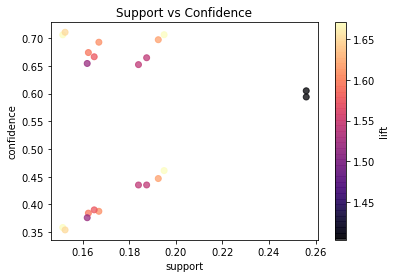

In [44]:
plt.scatter(rules2['support'], rules2['confidence'],c=rules2['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

### Scatter plot for support and lift of second association rule

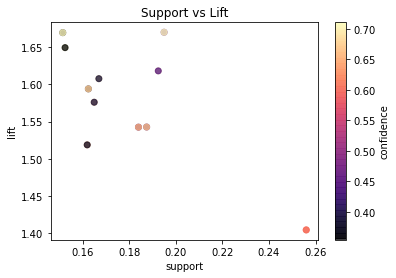

In [43]:
plt.scatter(rules2["support"], rules2["lift"],c=rules2['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

## Model 3
### Creating another association rule by taking different length in Apriori

In [28]:
book_sales3 = apriori(book, min_support=0.05, use_colnames=True)
book_sales3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, CookBks, DoItYBks)"
96,0.0560,"(YouthBks, ArtBks, CookBks, GeogBks)"
97,0.0650,"(ArtBks, CookBks, DoItYBks, GeogBks)"
98,0.0510,"(GeogBks, CookBks, DoItYBks, ChildBks, YouthBks)"


In [29]:
rules3 = association_rules(book_sales3, metric="lift", min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(ChildBks, ArtBks, CookBks, DoItYBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(CookBks),"(ChildBks, GeogBks, DoItYBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(DoItYBks),"(ChildBks, GeogBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
660,(ChildBks),"(GeogBks, CookBks, DoItYBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


### Sorting values based on the lift metric

In [30]:
rules3.sort_values('lift',ascending = False,inplace=True)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
511,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
510,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
509,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


### Scatter plot - Support vs confidence 

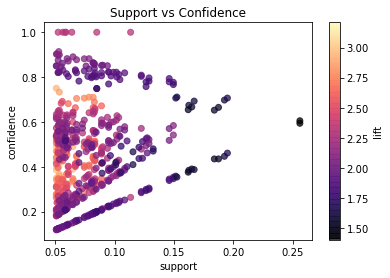

In [41]:
plt.scatter(rules3['support'], rules3['confidence'],c=rules3['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

### Scatter plot - Support vs lift

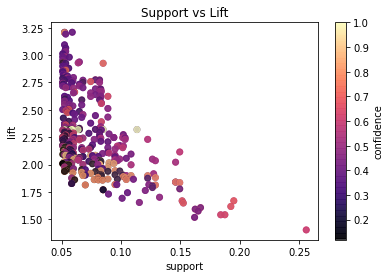

In [42]:
plt.scatter(rules3["support"], rules3["lift"],c=rules3['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

### Consildating the results

In [36]:
t={'Associan rule':pd.Series(['Rule1','Rule2','Rule3']),
               'Lift':[max(rules1.lift),max(rules2.lift),max(rules3.lift)]
               }
t=pd.DataFrame(t)
t

,Associan rule,Lift
0,Rule1,2.320186
1,Rule2,1.670264
2,Rule3,3.208789


### Predicting the associated books for Geology books using the third association rule

In [38]:
bookname='GeogBks'
rules3_GeogBks =(rules3.lift>1) & (rules3['antecedents'].astype(str).str.contains(bookname))
rules3.loc[rules3_GeogBks,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
511,"(GeogBks, CookBks)","(ChildBks, ItalCook)",3.208556
512,"(GeogBks, ItalCook)","(ChildBks, CookBks)",3.204346
648,"(GeogBks, DoItYBks)","(ChildBks, ArtBks, CookBks)",3.191886
504,"(ChildBks, GeogBks, CookBks)",(ItalCook),3.094014
640,"(ChildBks, GeogBks, DoItYBks)","(ArtBks, CookBks)",3.065639
...,...,...,...
102,"(ChildBks, GeogBks)",(CookBks),1.778809
23,(GeogBks),(YouthBks),1.764017
40,(GeogBks),(DoItYBks),1.702385
11,(GeogBks),(ChildBks),1.670264


## Conclusion:

### From all the above association rules that is created, the rule 3 has a higher lift metric, thereby showing more associations to all the books. Thus, we can predict the association rules with last model, rule3